### Base construction of graphs and calculation of basic statistics

In [17]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/CPD/Реализация/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/CPD/Реализация


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools

# для создания графа
import networkx as nx

%config InlineBackend.figure_format = 'retina'

**In constructing the graph, we will use the temporary correlation matrix obtained in the previous step (Collect&preproc data.ipynb)**

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


# Function for constructing a graph based on a correlation matrix
def build_graph_from_correlation_matrix(corr_matrix, coin_labels):
    num_nodes = corr_matrix.shape[0]
    G = nx.Graph()
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            correlation = corr_matrix[i, j]
            if correlation != 0:  # Eliminate zero correlations to save resources
                coin1 = coin_labels[i]
                coin2 = coin_labels[j]
                G.add_edge(coin1, coin2, weight=correlation)
    return G


def remove_low_correlation_edges(G, threshold):
    edges_to_remove = []
    for u, v, correlation in G.edges(data='weight'):
        if abs(correlation) < threshold:
            edges_to_remove.append((u, v))
    G.remove_edges_from(edges_to_remove)


# Function for calculating graph statistics
def calculate_graph_statistics(G):
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    average_degree = sum(dict(G.degree()).values()) / num_nodes
    density = nx.density(G)
    diameter = nx.diameter(G)
    clustering_coefficient = nx.average_clustering(G)
    return {
        "Number of nodes": num_nodes,
        "Number of edges": num_edges,
        "Average degree": average_degree,
        "Density": density,
        "Diameter": diameter,
        "Clustering coefficient": clustering_coefficient
    }

def plot_degree_distribution(G):
    degrees = [val for (node, val) in G.degree()]
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1, 1), color='skyblue', edgecolor='black')
    plt.xlabel('Степень')
    plt.ylabel('Частота')
    plt.title('Распределение степеней вершин')
    plt.show()



In [19]:
corr_month = pd.read_csv("corr_month.csv")
corr_month

,Date,Unnamed: 1,BTC-USD,ETH-USD,USDT-USD,BNB-USD,XRP-USD,DOGE-USD,ADA-USD,TRX-USD,...,XEM-USD,ANT-USD,GAS-USD,TRAC-USD,TEL-USD,DCR-USD,WAVES-USD,ONT-USD,LSK-USD,PRO-USD
0,2018-05-31,BTC-USD,1.000000,0.928195,-0.439828,0.595184,0.885434,0.764424,0.903736,0.748758,...,0.900087,0.594911,0.923345,0.505393,0.816388,0.660276,0.918422,0.911203,0.897140,0.619664
1,2018-05-31,ETH-USD,0.928195,1.000000,-0.587348,0.626004,0.957100,0.741719,0.938996,0.784907,...,0.935209,0.661995,0.898023,0.638829,0.853662,0.551695,0.942165,0.935088,0.900655,0.678323
2,2018-05-31,USDT-USD,-0.439828,-0.587348,1.000000,-0.124469,-0.698289,-0.368788,-0.579947,-0.350399,...,-0.649016,-0.275076,-0.502893,-0.300988,-0.316297,0.028664,-0.569893,-0.653038,-0.531653,-0.497907
3,2018-05-31,BNB-USD,0.595184,0.626004,-0.124469,1.000000,0.492195,0.152209,0.518462,0.391061,...,0.584236,0.413512,0.665874,0.505267,0.536162,0.775133,0.676785,0.476050,0.497511,0.423798
4,2018-05-31,XRP-USD,0.885434,0.957100,-0.698289,0.492195,1.000000,0.665334,0.920409,0.793295,...,0.956030,0.665807,0.860214,0.621550,0.723051,0.410033,0.889907,0.920956,0.855393,0.630737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,2024-05-31,DCR-USD,0.561300,0.601948,0.646889,0.300164,0.578051,0.528282,0.435150,-0.034636,...,0.764187,0.599066,0.542166,0.754714,0.592601,1.000000,0.745929,0.302349,0.441578,0.562682
3792,2024-05-31,WAVES-USD,0.685733,0.810088,0.675295,0.475882,0.543023,0.632095,0.725727,0.221311,...,0.837964,0.804570,0.773061,0.903413,0.470030,0.745929,1.000000,0.497429,0.554753,0.602492
3793,2024-05-31,ONT-USD,0.790262,0.852907,0.094981,0.855314,0.234712,0.720843,0.423759,0.127196,...,0.634600,0.841254,0.853146,0.613142,0.028231,0.302349,0.497429,1.000000,0.291998,0.425423
3794,2024-05-31,LSK-USD,0.290623,0.440175,0.085466,0.216046,0.525992,0.378428,0.871901,0.231394,...,0.403419,0.390719,0.341701,0.418111,0.617603,0.441578,0.554753,0.291998,1.000000,0.680194


### An example of constructing a graph for a specific point in time

In [20]:
# данные за апрель 2024
corr_matrix = corr_month[corr_month.Date == '2024-04-30'].iloc[:,2:].reset_index(drop = True)
np.array(corr_matrix)

array([[1.        , 0.86072198, 0.33700992, ..., 0.71396505, 0.67033015,
        0.15388478],
       [0.86072198, 1.        , 0.10384911, ..., 0.59822617, 0.59783698,
        0.09445289],
       [0.33700992, 0.10384911, 1.        , ..., 0.08669214, 0.26280284,
        0.17035074],
       ...,
       [0.71396505, 0.59822617, 0.08669214, ..., 1.        , 0.47520322,
        0.3262815 ],
       [0.67033015, 0.59783698, 0.26280284, ..., 0.47520322, 1.        ,
        0.2563877 ],
       [0.15388478, 0.09445289, 0.17035074, ..., 0.3262815 , 0.2563877 ,
        1.        ]])

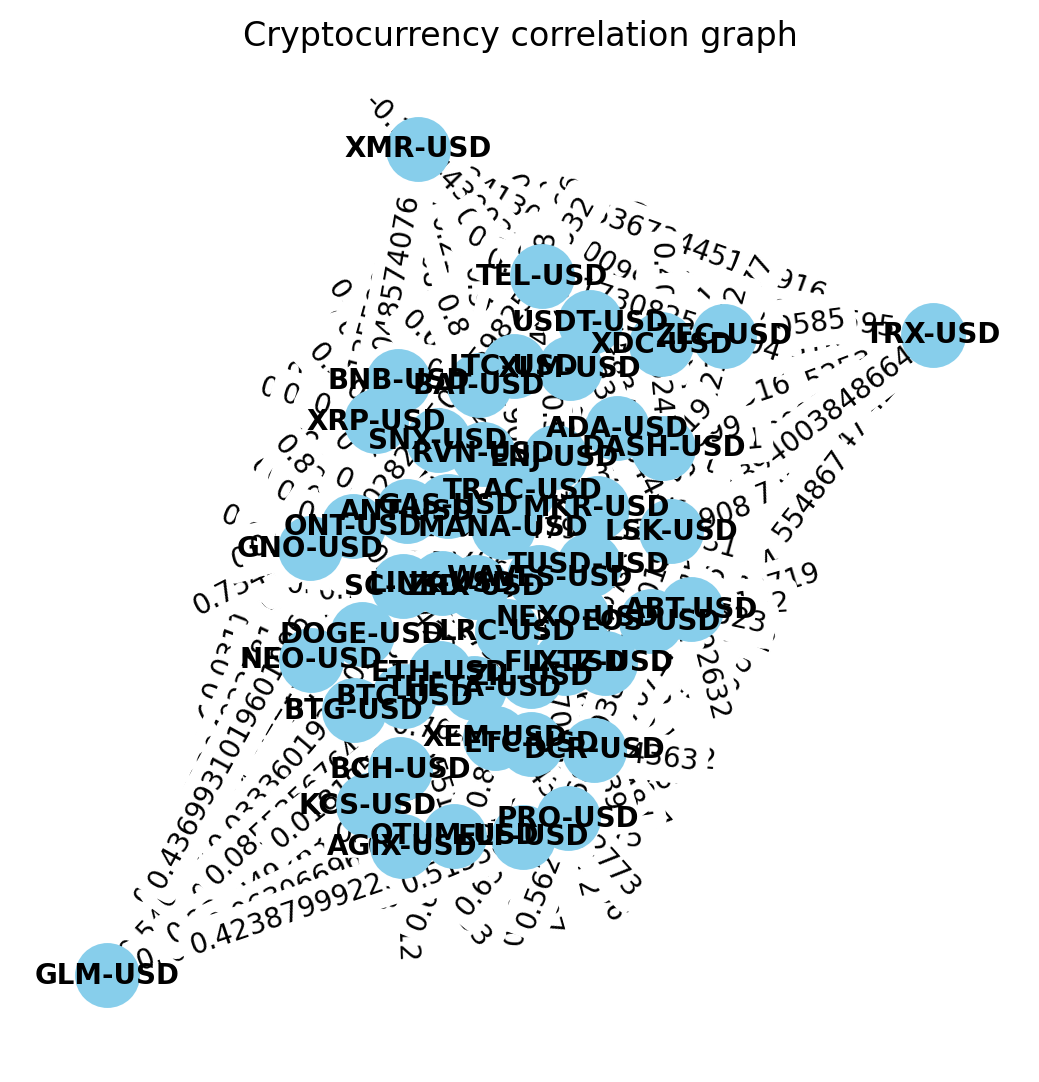

Graph statistics before removing low-correlated edges:
Number of nodes: 52
Number of edges: 1326
Average degree: 51.0
Density: 1.0
Diameter: 1
Clustering coefficient: 1.0


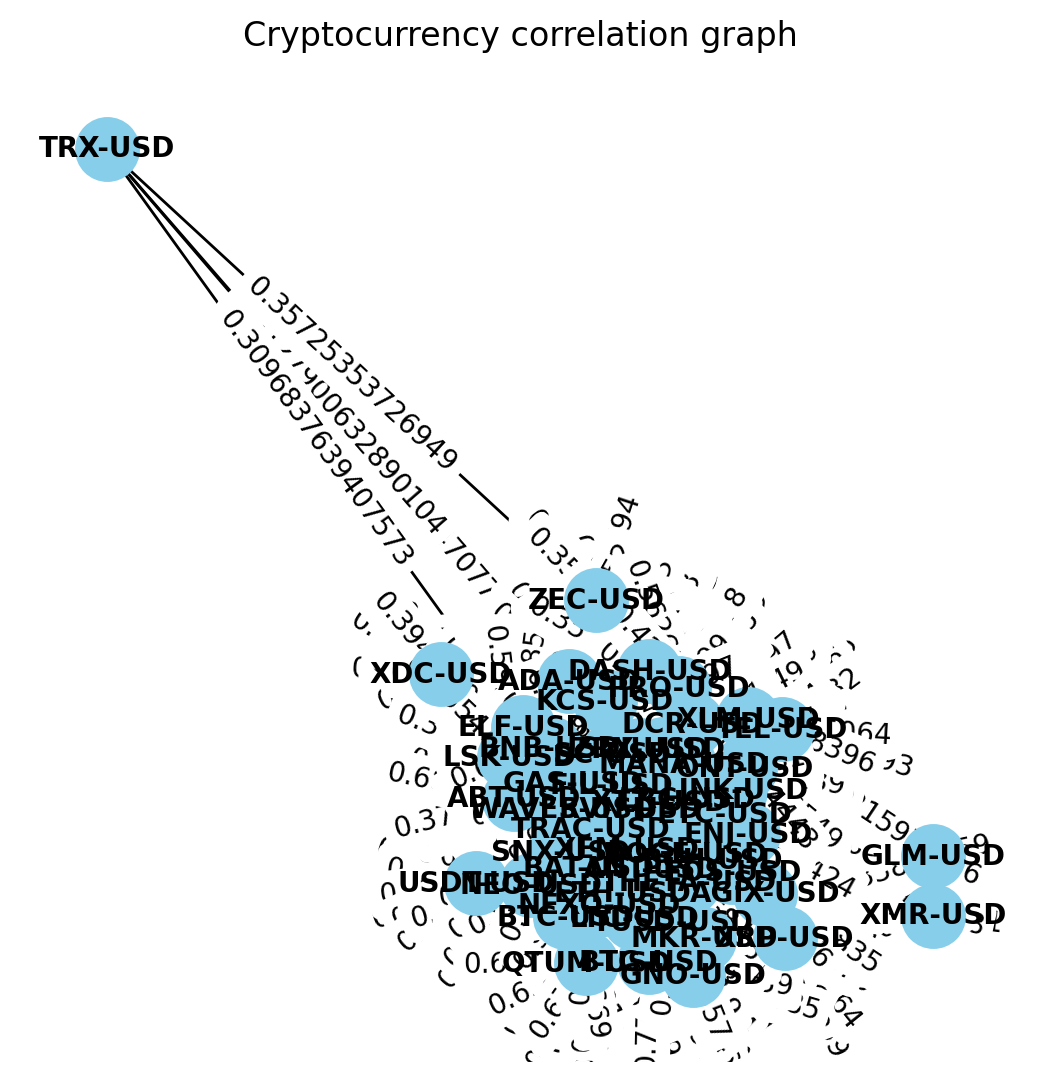

Graph statistics after removing low-correlated edges:
Number of nodes: 52
Number of edges: 1080
Average degree: 41.53846153846154
Density: 0.8144796380090498
Diameter: 3
Clustering coefficient: 0.8928954502843164


In [15]:
G = build_graph_from_correlation_matrix(np.array(corr_matrix), coin_labels)

plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Cryptocurrency correlation graph")
plt.show()


statistics = calculate_graph_statistics(G)
print("Graph statistics before removing low-correlated edges:")
for stat, value in statistics.items():
    print(f"{stat}: {value}")


# Removing low correlated edges
threshold = 0.3
remove_low_correlation_edges(G, threshold)


plt.figure(figsize=(5, 5))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Cryptocurrency correlation graph")
plt.show()


statistics = calculate_graph_statistics(G)
print("Graph statistics after removing low-correlated edges:")
for stat, value in statistics.items():
    print(f"{stat}: {value}")


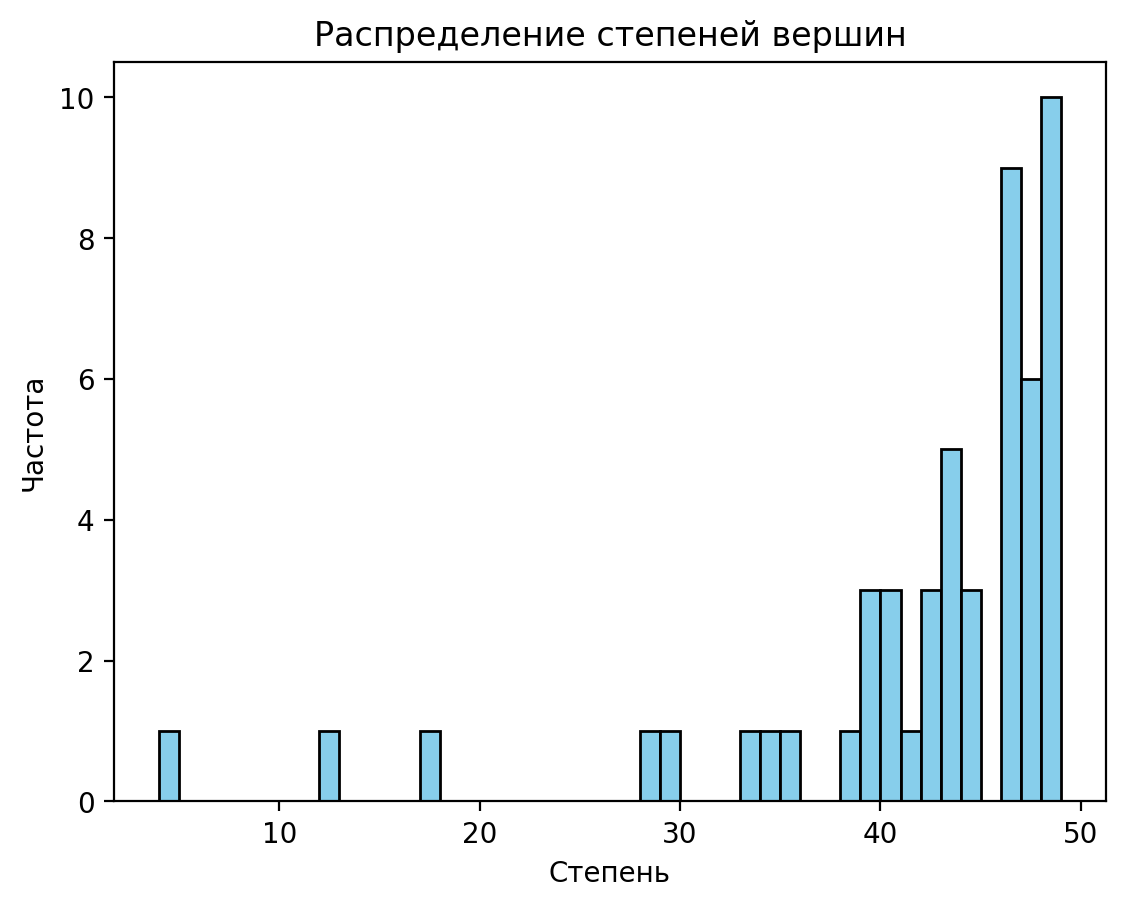

In [16]:
plot_degree_distribution(G)

**The result of processing the behavior of correlations in dynamics must be: a dynamic graph, connectivity between different coins, which changes over time.**

The main task is to test graph methods to solve the problem of change point detection.
Now, as a tagret, we will select the change points marked by the basic methods.